
# <font color="#1d479b">Sommaire</font>
   
2. [Predictions](#section_2)     
    2.1. [Linear Regression](#section_2_1)
    
    2.2. [Ridge Regression](#section_2_2)
    
    2.3. [SDG Regression](#section_2_3)
    
    2.4. [Random Forest](#section_2_4)
    
    2.5. [Choix hyperparametres](#section_2_5) 
    
    2.6. [Feature Importantce](#section_2_6)
 

In [79]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

In [80]:
df = pd.read_csv("data_seattle.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head();

In [81]:
df['Log10_SiteEnergyUse'] = np.log10(df['SiteEnergyUse'])
df.drop(columns=['SiteEnergyUse'], axis=1, inplace=True)

In [82]:
df.head();

# 1. DATASET WITHOUT ENERGYSTARScore

In [83]:
# DATASET WITH ENERGYSTARScore 
df_No_ENSTScore = df.drop(columns=["ENERGYSTARScore"])

In [84]:
df_No_ENSTScore.head();

In [85]:
# Definition of target and features variables

targets = ['Log10_SiteEnergyUse', 'TotalGHGEmissions']

target1 = ['Log10_SiteEnergyUse']
target2 = ['TotalGHGEmissions']

X = df_No_ENSTScore.iloc[:, ~df_No_ENSTScore.columns.isin(targets)]
y = df_No_ENSTScore.loc[:, target2]

In [88]:
print(X.shape)
print(y.shape)

(995, 66)
(995, 1)


# SKLEARN DummyRegressor

In [89]:
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define your input features (X) and target (y)
X = df_No_ENSTScore.iloc[:, ~df_No_ENSTScore.columns.isin(targets)]
y = df_No_ENSTScore.loc[:, target2]

# Fit the dummy regressor to your data
dummy = DummyRegressor(strategy='mean')
dummy.fit(X, y)

# Predict using the fitted dummy regressor
y_pred = dummy.predict(X)

# Calculate MSE, MAE, and R-Squared metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)


MSE: 743265.2622788673
RMSE: 862.1283328361661
MAE: 231.18756473826417
R2: 0.0


## Basic Regression

## 1.1 Linear Regression

- ### Best hyperparameters

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston

# Load the Boston Housing dataset
boston = load_boston()

# Split the dataset into features and target

X = df_No_ENSTScore.iloc[:, ~df_No_ENSTScore.columns.isin(targets)]
y = df_No_ENSTScore.loc[:, target2]

# Define the model
model = LinearRegression()

# Define the hyperparameters to tune
param_grid = {'fit_intercept': [True, False],
              'normalize': [True, False]}

# Perform the grid search
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, y)

# Print the best hyperparameters
print(grid.best_params_)


{'fit_intercept': True, 'normalize': False}


- ### Liner Regression

In [50]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definition of target and features variables


X = df_No_ENSTScore.iloc[:, ~df_No_ENSTScore.columns.isin(targets)]
y = df_No_ENSTScore.loc[:, target2]

# Robustly scale the features
scaler = RobustScaler()
X = scaler.fit_transform(X)

# Fit a Ridge regression model
reg = Ridge(fit_intercept=True, normalize=False)
reg.fit(X, y)

# Perform cross-validation
cv_results = cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the RMSE, MSE, MAE, and R^2
rmse = np.sqrt(-cv_results).mean()
mse = -cv_results.mean()
mae = mean_absolute_error(y, reg.predict(X))
r2 = reg.score(X, y)

print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)


RMSE: 721.6652847979146
MSE: 653236.7671680737
MAE: 203.38470296831744
R^2: 0.4946643218786124


## 1.2. RIDGE Regression

- ### Best hyperparameters

In [51]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston

# Load the Boston Housing dataset

# Split the dataset into features and target
X = df_No_ENSTScore.iloc[:, ~df_No_ENSTScore.columns.isin(targets)]
y = df_No_ENSTScore.loc[:, target2]

# Define the model
model = Ridge()

# Define the hyperparameters to tune
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0],
              'fit_intercept': [True, False],
              'normalize': [True, False],
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']}

# Perform the grid search
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, y)

# Print the best hyperparameters
print(grid.best_params_)

{'alpha': 10.0, 'fit_intercept': True, 'normalize': True, 'solver': 'auto'}


- ### RIDGE Regression

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definition of target and features variables
X = df_No_ENSTScore.iloc[:, ~df_No_ENSTScore.columns.isin(targets)]
y = df_No_ENSTScore.loc[:, target2]

# Robustly scale the features
scaler = RobustScaler()
X = scaler.fit_transform(X)

# Fit a Ridge regression model
reg = Ridge(alpha=10.0, fit_intercept= True, normalize= True, solver= 'auto')
reg.fit(X, y)

# Perform cross-validation
cv_results = cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the RMSE, MSE, MAE, and R^2
rmse = np.sqrt(-cv_results).mean()
mse = -cv_results.mean()
mae = mean_absolute_error(y, reg.predict(X))
r2 = reg.score(X, y)

print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)


RMSE: 657.9024186034014
MSE: 677579.0230219506
MAE: 202.79437198048421
R^2: 0.1413688546456593


## 1.3. SGDRegression

- ### Best hyperparameters

In [52]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston


# Split the dataset into features and target

X = df_No_ENSTScore.iloc[:, ~df_No_ENSTScore.columns.isin(targets)]
y = df_No_ENSTScore.loc[:, target2]

# Define the model
model = SGDRegressor()

# Define the hyperparameters to tune
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1],
              'l1_ratio': [0.15, 0.25, 0.5, 0.75],
              'penalty': ['l2', 'l1', 'elasticnet'],
              'fit_intercept': [True, False],
              'max_iter': [1000, 2000, 3000],
              'tol': [1e-3, 1e-4, 1e-5]}

# Perform the grid search
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, y)

# Print the best hyperparameters
print(grid.best_params_)


{'alpha': 0.001, 'fit_intercept': False, 'l1_ratio': 0.25, 'max_iter': 1000, 'penalty': 'elasticnet', 'tol': 0.0001}


- ### SGDRegression

In [53]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df_No_ENSTScore.iloc[:, ~df_No_ENSTScore.columns.isin(targets)]
y = df_No_ENSTScore.loc[:, target2]

# Robustly scale the features
scaler = RobustScaler()
X = scaler.fit_transform(X)

# Fit a linear regression model using Stochastic Gradient Descent (SGD)
reg = SGDRegressor(alpha=0.001, fit_intercept=False, l1_ratio=0.25, max_iter=1000, penalty='elasticnet', tol=0.0001)
reg.fit(X, y)

# Perform cross-validation
cv_results = cross_val_score(reg, X, y, cv=10, scoring='neg_mean_squared_error')

# Calculate the RMSE, MSE, MAE, and R^2
rmse = np.sqrt(-cv_results).mean()
mse = -cv_results.mean()
mae = mean_absolute_error(y, reg.predict(X))
r2 = reg.score(X, y)

print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)

RMSE: 559.0581325179432
MSE: 557250.5467245199
MAE: 200.33519687268793
R^2: 0.44331577925221843


## 1.3. Random Forest

- ### Best hyperparameters

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


# Split the dataset into features and target
X = df_No_ENSTScore.iloc[:, ~df_No_ENSTScore.columns.isin(targets)]
y = df_No_ENSTScore.loc[:, target2]

# Define the model
model = RandomForestRegressor()

# Define the hyperparameters to tune
param_grid = {'n_estimators': [50, 100, 150, 200],
              'max_depth': [5, 10, 15, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

# Perform the grid search
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, y)

# Print the best hyperparameters
print(grid.best_params_)

{'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


- ### Random Forest Regression

In [35]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X = df_No_ENSTScore.iloc[:, ~df_No_ENSTScore.columns.isin(targets)]
y = df_No_ENSTScore.loc[:, target2]

# Robustly scale the features
scaler = RobustScaler()
X = scaler.fit_transform(X)

# Fit a Random Forest regression model
reg = RandomForestRegressor(max_depth=15, max_features='log2', min_samples_leaf= 1, min_samples_split=2, n_estimators=50)
reg.fit(X, y)

# Perform cross-validation
cv_results = cross_val_score(reg, X, y, cv=10, scoring='neg_mean_squared_error')

# Calculate the RMSE, MSE, MAE, and R^2
rmse = np.sqrt(-cv_results).mean()
mse = -cv_results.mean()
mae = mean_absolute_error(y, reg.predict(X))
r2 = reg.score(X, y)

print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)


RMSE: 462.0442521216943
MSE: 494227.2792605365
MAE: 65.04316302687027
R^2: 0.9118557304095781


### Best Model

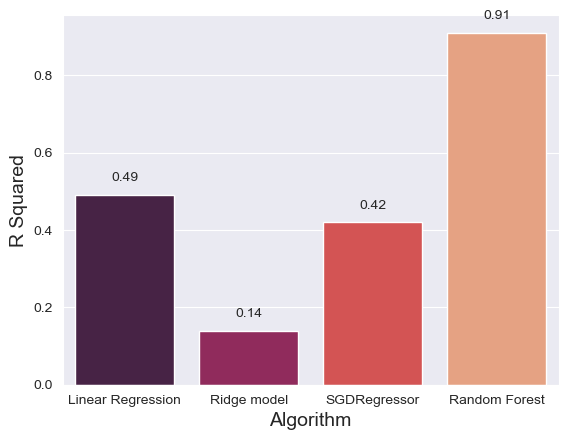

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a dataframe with your data
data = {"Algorithm": ["Linear Regression", "Ridge model", "SGDRegressor", "Random Forest"], "Rsquared": [0.49, 0.14, 0.42, 0.91]}
df = pd.DataFrame(data)

sns.set_style("darkgrid")

# Create a bar plot using seaborn
ax = sns.barplot(x="Algorithm", y="Rsquared", data=df, palette="rocket")


# Add the values on top of the bars
for i, value in enumerate(df["Rsquared"]):
    ax.annotate("%.2f" % value, xy=(i, value), xytext=(0, 10), textcoords="offset points", ha="center")


# Set the x and y labels
plt.xlabel("Algorithm", fontsize=14)
plt.ylabel("R Squared", fontsize=14)

# Show the plot
plt.show()

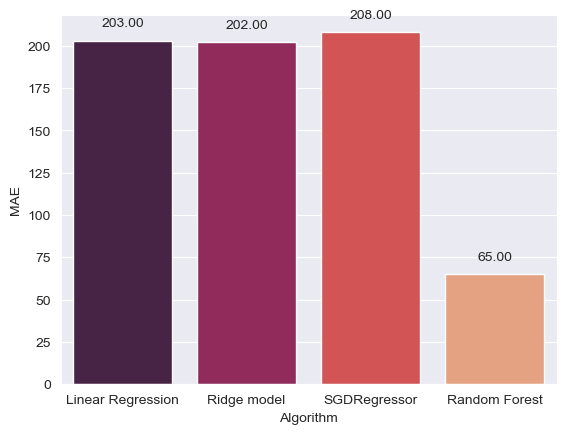

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a dataframe with your data
data = {"Algorithm": ["Linear Regression", "Ridge model", "SGDRegressor", "Random Forest"], "MAE":[203, 202, 208, 65]}
df = pd.DataFrame(data)

sns.set_style("darkgrid")

# Create a bar plot using seaborn
ax = sns.barplot(x="Algorithm", y="MAE", data=df, palette="rocket")


# Add the values on top of the bars
for i, value in enumerate(df["MAE"]):
    ax.annotate("%.2f" % value, xy=(i, value), xytext=(0, 10), textcoords="offset points", ha="center")


# Show the plot
plt.show()


## Feature Importance sans Energy Star Score

Les variables ci-dessous comptent pour plus de 80% de la prévision :
- LargestPropertyUseType_Hospital (General Medical & Surgical): 0.1842
- PrimaryPropertyType_Hospital: 0.1741
- BuildingType_Campus: 0.1252
- GFAPerBuilding: 0.0890
- GFAPerFloor: 0.0740
- ZipCode: 0.0579
- Neighborhood_East: 0.0499
- Address_Way: 0.0407
- YearBuilt

In [73]:
from sklearn.ensemble import RandomForestRegressor


# Split the dataset into features and target
X = df_No_ENSTScore.iloc[:, ~df_No_ENSTScore.columns.isin(targets)]
y = df_No_ENSTScore.loc[:, target2]

# Define the model
model = RandomForestRegressor()

# Train the model on the data
model.fit(X, y)

# Get the feature importances
importances = model.feature_importances_

# Get the column names
feature_names = X.columns

# Sort the feature importances in descending order
indices = importances.argsort()[::-1]

# Print the feature importances and column names in descending order
for i in indices:
    print("{}: {:.4f}".format(feature_names[i], importances[i]))


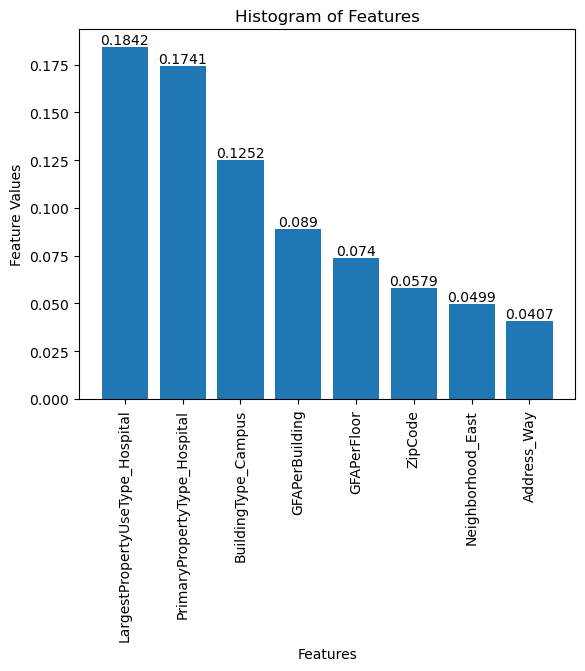

In [2]:
import matplotlib.pyplot as plt

# Feature names and values
feature_names = ["LargestPropertyUseType_Hospital", "PrimaryPropertyType_Hospital", "BuildingType_Campus",
                 "GFAPerBuilding", "GFAPerFloor", "ZipCode", "Neighborhood_East", "Address_Way"]
feature_values = [0.1842, 0.1741, 0.1252, 0.0890, 0.0740, 0.0579, 0.0499, 0.0407]

# Plot the histogram
plt.bar(feature_names, feature_values)
plt.title("Histogram of Features")
plt.xlabel("Features")
plt.ylabel("Feature Values")

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add numbers on top of each feature bar
for i, val in enumerate(feature_values):
    plt.text(i, val, str(val), horizontalalignment='center', verticalalignment='bottom')

# Display the plot
plt.show()


# 2. DATASET WITH ENERGYSTARScore

In [90]:
df_with_ENSTScore = df.copy()
df_with_ENSTScore.head();

In [91]:
# Definition of target and features variables

targets = ['Log10_SiteEnergyUse', 'TotalGHGEmissions']

target1 = ['Log10_SiteEnergyUse']
target2 = ['TotalGHGEmissions']

X = df_with_ENSTScore.iloc[:, ~df_with_ENSTScore.columns.isin(targets)]
y = df_with_ENSTScore.loc[:, target2]

# SKLEARN DummyRegressor

In [92]:
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define your input features (X) and target (y)
X = df_with_ENSTScore.iloc[:, ~df_with_ENSTScore.columns.isin(targets)]
y = df_with_ENSTScore.loc[:, target2]

# Fit the dummy regressor to your data
dummy = DummyRegressor(strategy='mean')
dummy.fit(X, y)

# Predict using the fitted dummy regressor
y_pred = dummy.predict(X)

# Calculate MSE, MAE, and R-Squared metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 743265.2622788673
RMSE: 862.1283328361661
MAE: 231.18756473826417
R2: 0.0


## Linear Regression

## 2.1. Linear Regression

- ### Best hyperparameters

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston

# Load the Boston Housing dataset
boston = load_boston()

# Split the dataset into features and target

X = df_with_ENSTScore.iloc[:, ~df_with_ENSTScore.columns.isin(targets)]
y = df_with_ENSTScore.loc[:, target2]

# Define the model
model = LinearRegression()

# Define the hyperparameters to tune
param_grid = {'fit_intercept': [True, False],
              'normalize': [True, False]}

# Perform the grid search
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, y)

# Print the best hyperparameters
print(grid.best_params_)


{'fit_intercept': True, 'normalize': False}


- ### Linear Regression

In [93]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definition of target and features variables

X = df_with_ENSTScore.iloc[:, ~df_with_ENSTScore.columns.isin(targets)]
y = df_with_ENSTScore.loc[:, target2]


# Robustly scale the features
scaler = RobustScaler()
X = scaler.fit_transform(X)

# Fit a Ridge regression model
reg = Ridge(fit_intercept=True, normalize=False)
reg.fit(X, y)

# Perform cross-validation
cv_results = cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the RMSE, MSE, MAE, and R^2
rmse = np.sqrt(-cv_results).mean()
mse = -cv_results.mean()
mae = mean_absolute_error(y, reg.predict(X))
r2 = reg.score(X, y)

print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)


RMSE: 720.7229464306413
MSE: 647431.8979360878
MAE: 208.05228392491975
R^2: 0.5030473720262003


## 2.2. Ridge Regression

- ### Best hyperparameters

In [59]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston

# Load the Boston Housing dataset

# Split the dataset into features and target
X = df_with_ENSTScore.iloc[:, ~df_with_ENSTScore.columns.isin(targets)]
y = df_with_ENSTScore.loc[:, target2]

# Define the model
model = Ridge()

# Define the hyperparameters to tune
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0],
              'fit_intercept': [True, False],
              'normalize': [True, False],
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']}

# Perform the grid search
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, y)

# Print the best hyperparameters
print(grid.best_params_)

{'alpha': 10.0, 'fit_intercept': True, 'normalize': True, 'solver': 'svd'}


- ### Ridge Regression

In [94]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definition of target and features variables

X = df_with_ENSTScore.iloc[:, ~df_with_ENSTScore.columns.isin(targets)]
y = df_with_ENSTScore.loc[:, target2]


# Robustly scale the features
scaler = RobustScaler()
X = scaler.fit_transform(X)

# Fit a Ridge regression model
reg = Ridge(alpha=10, fit_intercept=True, normalize=True, solver = 'svd')
reg.fit(X, y)

# Perform cross-validation
cv_results = cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the RMSE, MSE, MAE, and R^2
rmse = np.sqrt(-cv_results).mean()
mse = -cv_results.mean()
mae = mean_absolute_error(y, reg.predict(X))
r2 = reg.score(X, y)

print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)


RMSE: 657.6576870414414
MSE: 677243.6482608651
MAE: 202.15524445265106
R^2: 0.1430428974969492


## 2.2. SGDRegression

- ### Best hyperparameters

In [60]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston


# Split the dataset into features and target

X = df_with_ENSTScore.iloc[:, ~df_with_ENSTScore.columns.isin(targets)]
y = df_with_ENSTScore.loc[:, target2]

# Define the model
model = SGDRegressor()

# Define the hyperparameters to tune
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1],
              'l1_ratio': [0.15, 0.25, 0.5, 0.75],
              'penalty': ['l2', 'l1', 'elasticnet'],
              'fit_intercept': [True, False],
              'max_iter': [1000, 2000, 3000],
              'tol': [1e-3, 1e-4, 1e-5]}

# Perform the grid search
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, y)

# Print the best hyperparameters
print(grid.best_params_)

{'alpha': 0.01, 'fit_intercept': True, 'l1_ratio': 0.75, 'max_iter': 1000, 'penalty': 'l2', 'tol': 0.0001}


- ### SGD Regression

In [95]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df_with_ENSTScore.iloc[:, ~df_with_ENSTScore.columns.isin(targets)]
y = df_with_ENSTScore.loc[:, target2]

# Robustly scale the features
scaler = RobustScaler()
X = scaler.fit_transform(X)

# Fit a linear regression model using Stochastic Gradient Descent (SGD)
reg = SGDRegressor(alpha=0.01, fit_intercept=False, l1_ratio=0.75, max_iter=1000, penalty='l2', tol=0.0001)
reg.fit(X, y)

# Perform cross-validation
cv_results = cross_val_score(reg, X, y, cv=10, scoring='neg_mean_squared_error')

# Calculate the RMSE, MSE, MAE, and R^2
rmse = np.sqrt(-cv_results).mean()
mse = -cv_results.mean()
mae = mean_absolute_error(y, reg.predict(X))
r2 = reg.score(X, y)

print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)


RMSE: 557.6396724954021
MSE: 599311.1392989152
MAE: 200.01215628168538
R^2: 0.40261069942757033


## 2.3. Random Forest

- ### Best hyperparameters

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


# Split the dataset into features and target
X = df_with_ENSTScore.iloc[:, ~df_with_ENSTScore.columns.isin(targets)]
y = df_with_ENSTScore.loc[:, target1]

# Define the model
model = RandomForestRegressor()

# Define the hyperparameters to tune
param_grid = {'n_estimators': [50, 100, 150, 200],
              'max_depth': [5, 10, 15, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

# Perform the grid search
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, y)

# Print the best hyperparameters
print(grid.best_params_)

{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


- ### Random Forest

In [96]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definition of target and features variables

X = df_with_ENSTScore.iloc[:, ~df_with_ENSTScore.columns.isin(targets)]
y = df_with_ENSTScore.loc[:, target2]


# Robustly scale the features
scaler = RobustScaler()
X = scaler.fit_transform(X)

# Fit a Random Forest regression model
reg = RandomForestRegressor(n_estimators=100, max_features='auto', min_samples_leaf=1, min_samples_split= 2)
reg.fit(X, y)

# Perform cross-validation
cv_results = cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the RMSE, MSE, MAE, and R^2
rmse = np.sqrt(-cv_results).mean()
mse = -cv_results.mean()
mae = mean_absolute_error(y, reg.predict(X))
r2 = reg.score(X, y)

print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)


RMSE: 679.0482381827553
MSE: 582969.617468917
MAE: 47.106815175879404
R^2: 0.9248075966912976


# The best model is RadomForest with ENERGYSTARScore
- **Smaller MAE (46) and higher R squared (0.92).**

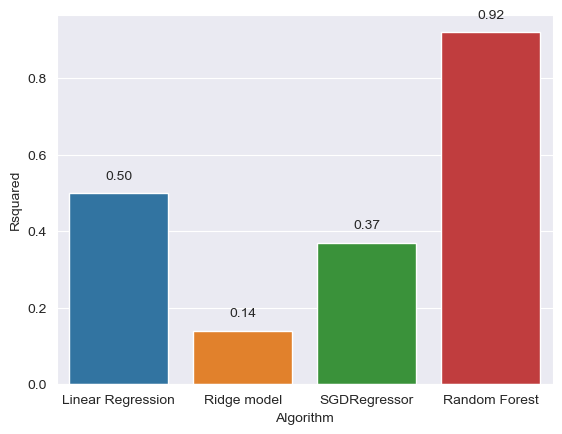

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a dataframe with your data
data = {"Algorithm": ["Linear Regression", "Ridge model", "SGDRegressor", "Random Forest"], "Rsquared": [0.50, 0.14, 0.37, 0.92]}
df = pd.DataFrame(data)

sns.set_style("darkgrid")

# Create a bar plot using seaborn
ax = sns.barplot(x="Algorithm", y="Rsquared", data=df)

# Add the values on top of the bars
for i, value in enumerate(df["Rsquared"]):
    ax.annotate("%.2f" % value, xy=(i, value), xytext=(0, 10), textcoords="offset points", ha="center")


# Show the plot
plt.show()



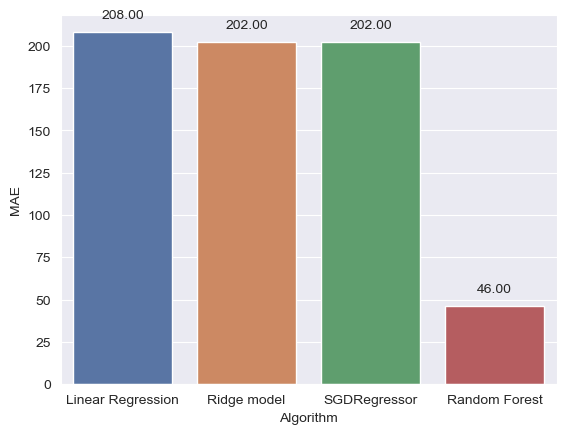

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a dataframe with your data
data = {"Algorithm": ["Linear Regression", "Ridge model", "SGDRegressor", "Random Forest"], "MAE":[208, 202, 202, 46]}
df = pd.DataFrame(data)

sns.set_style("darkgrid")

# Create a bar plot using seaborn
ax = sns.barplot(x="Algorithm", y="MAE", data=df, palette="deep")

# Add the values on top of the bars
# Add the values on top of the bars
for i, value in enumerate(df["MAE"]):
    ax.annotate("%.2f" % value, xy=(i, value), xytext=(0, 10), textcoords="offset points", ha="center")


# Show the plot
plt.show()


## Feature Importance avec Energy Star Score

Les variables ci-dessous comptent pour plus de 80% de la prévision :
- GFAPerBuilding: 0.6567
- ENERGYSTARScore: 0.0931
- PrimaryPropertyType_Warehouse: 0.0283
- GFAPerFloor: 0.0256

In [97]:
from sklearn.ensemble import RandomForestRegressor


# Split the dataset into features and target
X = df_with_ENSTScore.iloc[:, ~df_with_ENSTScore.columns.isin(targets)]
y = df_with_ENSTScore.loc[:, target1]

# Define the model
model = RandomForestRegressor(n_estimators=100)

# Train the model on the data
model.fit(X, y)

# Get the feature importances
importances = model.feature_importances_

# Get the column names
feature_names = X.columns

# Sort the feature importances in descending order
indices = importances.argsort()[::-1]

# Print the feature importances and column names in descending order
for i in indices:
    print("{}: {:.4f}".format(feature_names[i], importances[i]));

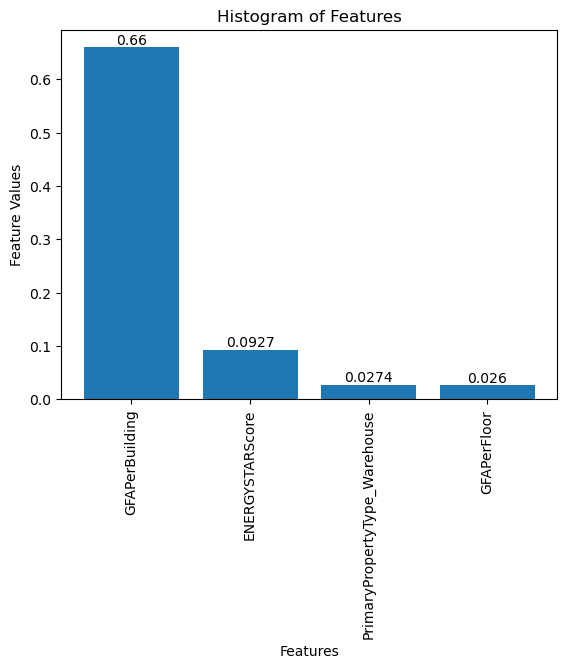

In [1]:
import matplotlib.pyplot as plt

# Feature names and values
feature_names = ["GFAPerBuilding", "ENERGYSTARScore", "PrimaryPropertyType_Warehouse", "GFAPerFloor"]
feature_values = [0.6600, 0.0927, 0.0274, 0.0260]

# Plot the histogram
plt.bar(feature_names, feature_values)
plt.title("Histogram of Features")
plt.xlabel("Features")
plt.ylabel("Feature Values")

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add numbers on top of each feature bar
for i, val in enumerate(feature_values):
    plt.text(i, val, str(val), horizontalalignment='center', verticalalignment='bottom')

# Display the plot
plt.show()
